Start by loading the data...

In [1]:
from Test_number_of_datapoints import *
from Backward_feature_selection import *

'''Defining folders where data, feature engineering results, and other results are stored.'''
# full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_no_feature_engineering/dataset/New_Crack_Len_FULL_OG_dataframe_2023_11_16.csv"
full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/dataset/feature_transformations_2023-11-16/height/HEIGHTALL_TRANSFORMED_FEATURES.csv"
backward_feat_selection_results_folder = '/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/results' 
best_hyperparameters_results_folder = '/Volumes/Jake_ssd/bayesian_optimization'

saving_folder = '/Volumes/Jake_ssd/Test_number_of_datapoints'
if(not os.path.exists(saving_folder)): os.makedirs(saving_folder)


'''Loading data'''
labels_to_predict = ['impact site x', 'impact site y', 'height']
model_types = ['linear', 'ridge', 'lasso', 'poly2', 'ANN', 'GPR', 'RF']
# model_types = ['linear', 'ridge', 'lasso']
# model_types = ['poly2', 'ANN', 'GPR', 'RF']
# model_types = ['poly2']


all_labels = ['height', 'phi', 'theta', 
        'impact site x', 'impact site y', 'impact site z', 
        'impact site r', 'impact site phi', 'impact site theta']

# Generate some synthetic data for demonstration purposes
df = pd.read_csv(full_dataset_pathname)



'''
removes all unwatned features, and normalizes features. (zero centering and then normalizing all featuresbetween -10 and 10)
also splits data up into the features and labels.
labels are not normalized.
'''
feature_df, label_df = get_feature_and_label_df(df, all_labels)

Now get the features you want to include for each model based on backward feature selection results

In [2]:
all_features_to_keep = {}

min_features = 1 #minimum number of features you want to select from BFS (backward feature selection)
max_features = 25 #maximum number of features you want to select from BFS
for label in labels_to_predict:
    all_features_to_keep[label] = {}
    for model_type in model_types:
        best_features = get_best_features(backward_feat_selection_results_folder, label, model_type, min_features, max_features)
        all_features_to_keep[label][model_type] = best_features


Now we can set up the indexes for 5 fold cross validation

In [3]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
splits = [(train_index, test_index) for train_index, test_index in kf.split(feature_df)]


fold = 0
fold_indicies = {}
for train, test in splits:
    fold += 1
    print(f'train length fold {fold} = {len(train)}')
    print(f'test length fold {fold} = {len(test)}\n')

    fold_indicies[fold] = {}
    fold_indicies[fold]['train'] = train
    fold_indicies[fold]['test'] = test

train length fold 1 = 240
test length fold 1 = 61

train length fold 2 = 241
test length fold 2 = 60

train length fold 3 = 241
test length fold 3 = 60

train length fold 4 = 241
test length fold 4 = 60

train length fold 5 = 241
test length fold 5 = 60



Now we can finally start to train the models with variable lengths of the datasets.

In [4]:
Num_training_datapoints_arr = [50, 75, 100, 125, 150, 175, 200, 225, 240]
# Num_training_datapoints_arr = [225]

performances_dictionary = train_models_with_varying_number_datapoints(feature_df, label_df, labels_to_predict, model_types, all_features_to_keep, Num_training_datapoints_arr, fold_indicies)

/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e+02, tolerance: 2.719e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.420e+02, tolerance: 1.488e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

patience reached
End train R2 score = 0.9791110227951957 validation R2 score = 0.8621701567383533
patience reached
End train R2 score = 0.9878082254960946 validation R2 score = -1.0712559539621718
patience reached
End train R2 score = 0.9773523103232484 validation R2 score = 0.0740739608573685
patience reached
End train R2 score = 0.9850303176979257 validation R2 score = 0.7871032798651834
patience reached
End train R2 score = 0.9928079181958411 validation R2 score = 0.8616877987259581
patience reached
End train R2 score = 0.9656240447529247 validation R2 score = 0.85966990830462
patience reached
End train R2 score = 0.9416925077866477 validation R2 score = 0.6636912381217815
patience reached
End train R2 score = 0.9863045940041942 validation R2 score = 0.3867110374166344
patience reached
End train R2 score = 0.9563743737141476 validation R2 score = 0.6649877625574419
patience reached
End train R2 score = 0.95311014886169 validation R2 score = -0.26343600129886746
patience reached
End 

/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.641e+02, tolerance: 1.852e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.975e+02, tolerance: 1.584e+00
  model = cd_fast.enet_coordinate_descent(
/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

patience reached
End train R2 score = 0.9889379571322386 validation R2 score = -1.0239746313272708
patience reached
End train R2 score = 0.9325751731923372 validation R2 score = 0.00949459061129565
patience reached
End train R2 score = 0.9810283241624452 validation R2 score = 0.2881315454380259
patience reached
End train R2 score = 0.9752871991685592 validation R2 score = 0.16769958883544445
patience reached
End train R2 score = 0.9139040727631836 validation R2 score = -1.1620195646522165
patience reached
End train R2 score = 0.9826413145966093 validation R2 score = 0.7603004706633728
patience reached
End train R2 score = 0.9391663413999605 validation R2 score = 0.6543202395496142
patience reached
End train R2 score = 0.9362856698113295 validation R2 score = -0.25045529043793047
patience reached
End train R2 score = 0.9501240175136841 validation R2 score = 0.1480839858845291
patience reached
End train R2 score = 0.9406300164088339 validation R2 score = 0.4461983748139172
patience reach

/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+00, tolerance: 5.334e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e+00, tolerance: 5.541e-03
  model = cd_fast.enet_coordinate_descent(
/Users/jakehirst/miniconda3/envs/tfp_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

patience reached
End train R2 score = 0.3674287545602102 validation R2 score = 0.18965856222412802
patience reached
End train R2 score = 0.5480554067709302 validation R2 score = -0.6024643102218037
patience reached
End train R2 score = 0.5293093762138654 validation R2 score = -0.3712164229481294
patience reached
End train R2 score = 0.3002544494586462 validation R2 score = -0.12751443187651668
patience reached
End train R2 score = 0.32609206077457564 validation R2 score = 0.17325236326161786
patience reached
End train R2 score = 0.2636125141482156 validation R2 score = 0.24289219126289552
patience reached
End train R2 score = 0.2927019422422946 validation R2 score = 0.10561220180510578
patience reached
End train R2 score = 0.07290217285945944 validation R2 score = -0.5126158586479623
End train R2 score = 0.40819799942820245 validation R2 score = 0.2826644776149375
patience reached
End train R2 score = 0.20321223228712415 validation R2 score = 0.13899743624435368
patience reached
End tr

Now we can save the performances as .csv's for future use.

In [5]:
for label in labels_to_predict:
    for model_type in model_types:
        df = pd.DataFrame(performances_dictionary[label][model_type])
        path_to_save = saving_folder + f'/{label}/{model_type}'
        if(not os.path.exists(path_to_save)): os.makedirs(path_to_save)
        df.to_csv(path_to_save + '/performances_varying_number_of_points.csv')

Now we can plot the performances for each model for each metric and each model type

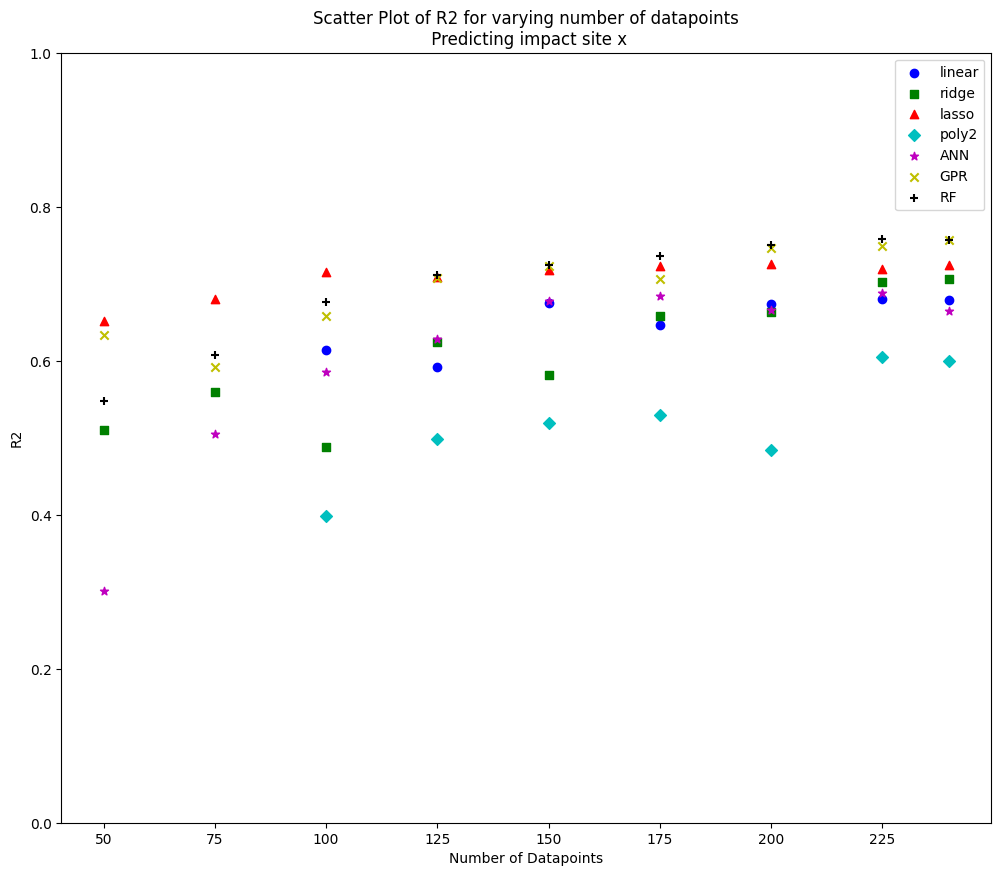

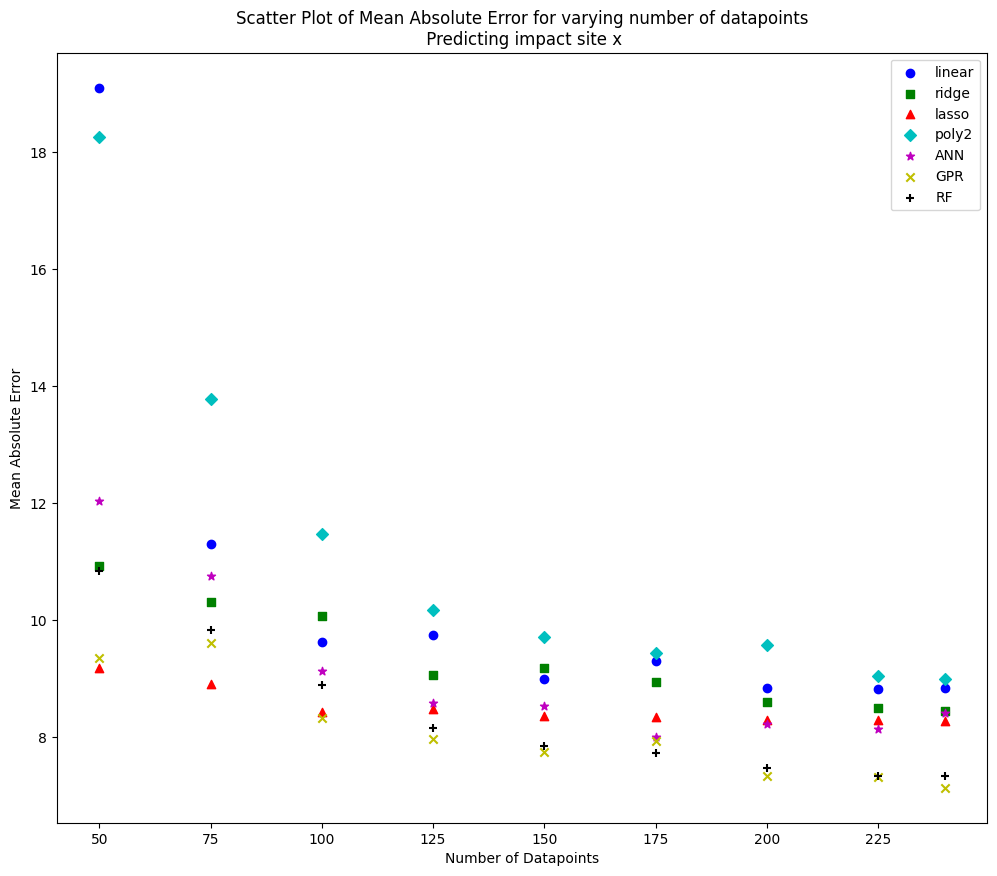

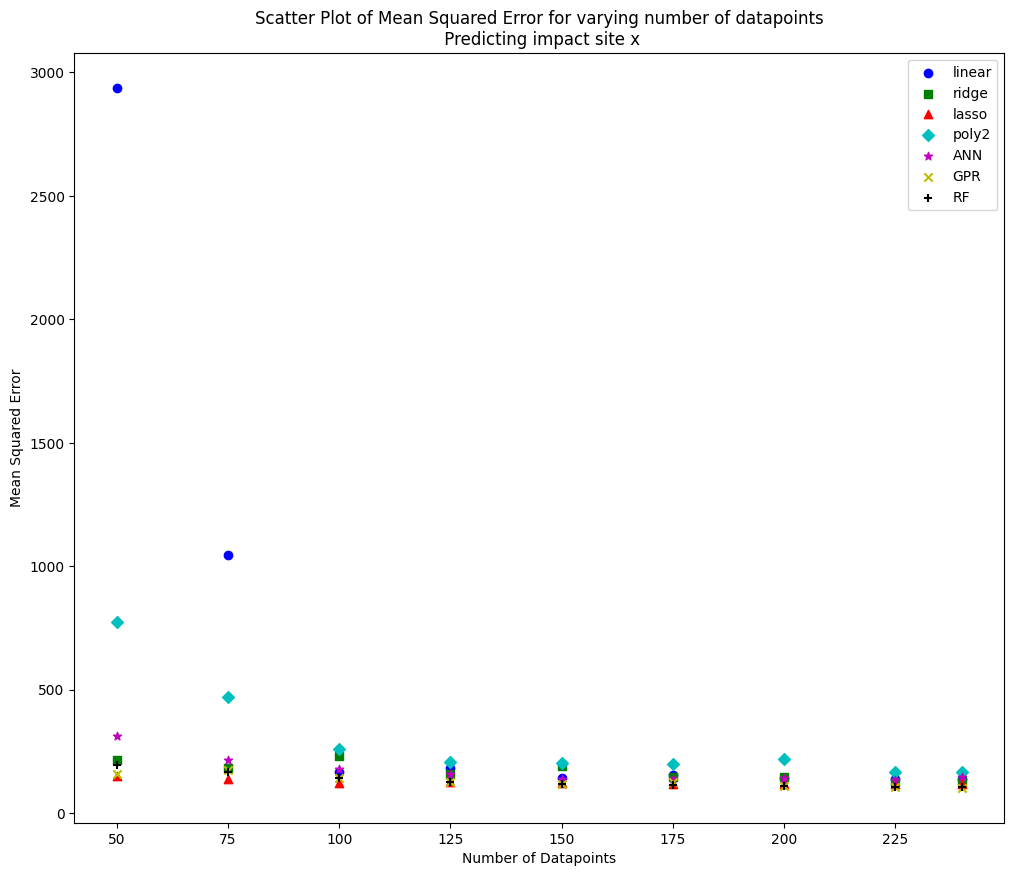

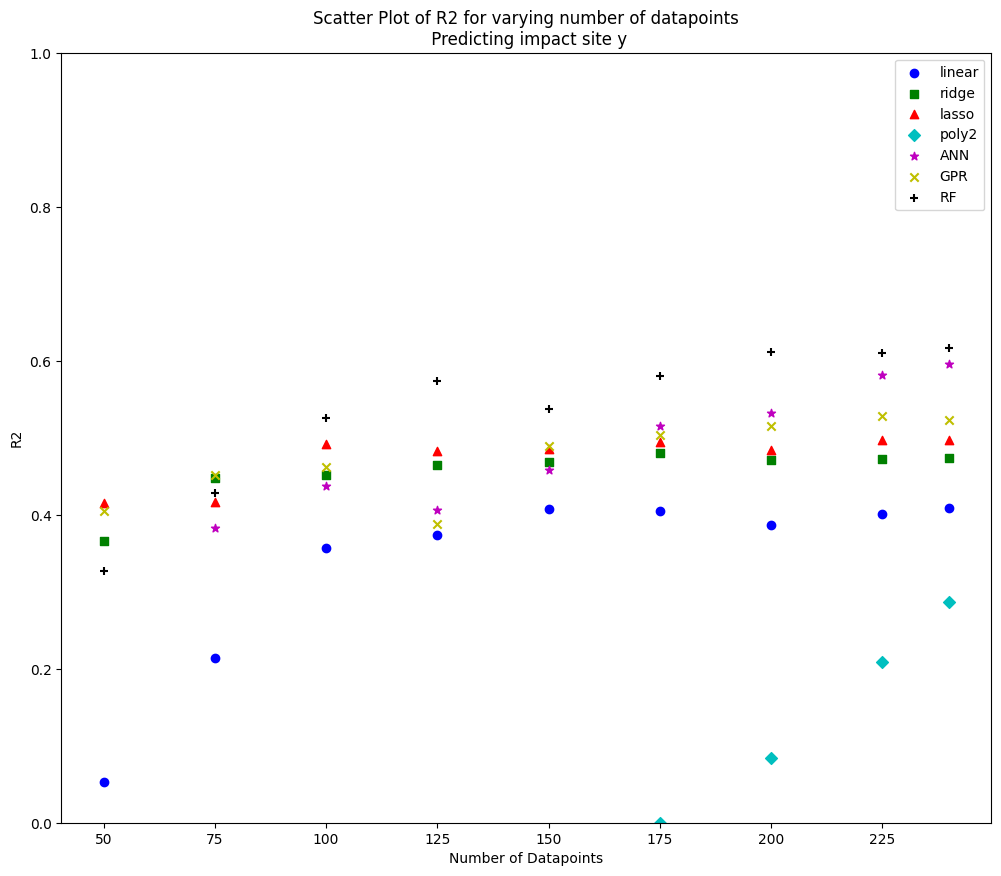

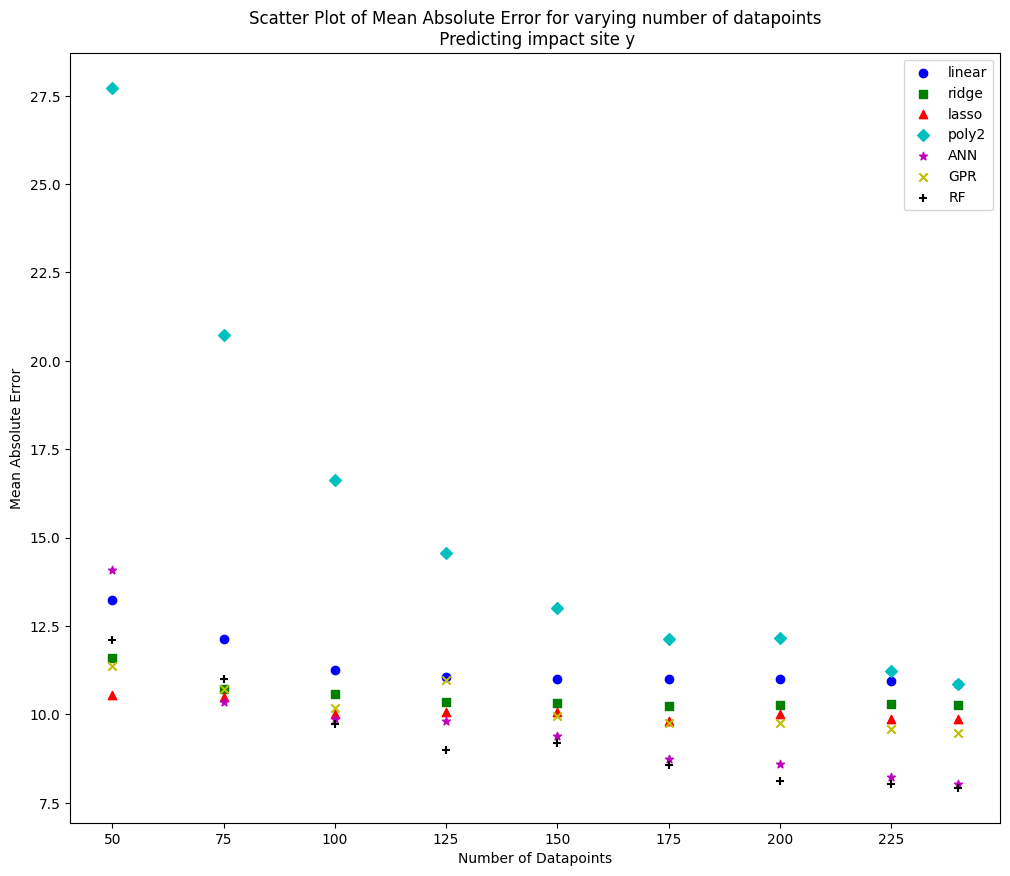

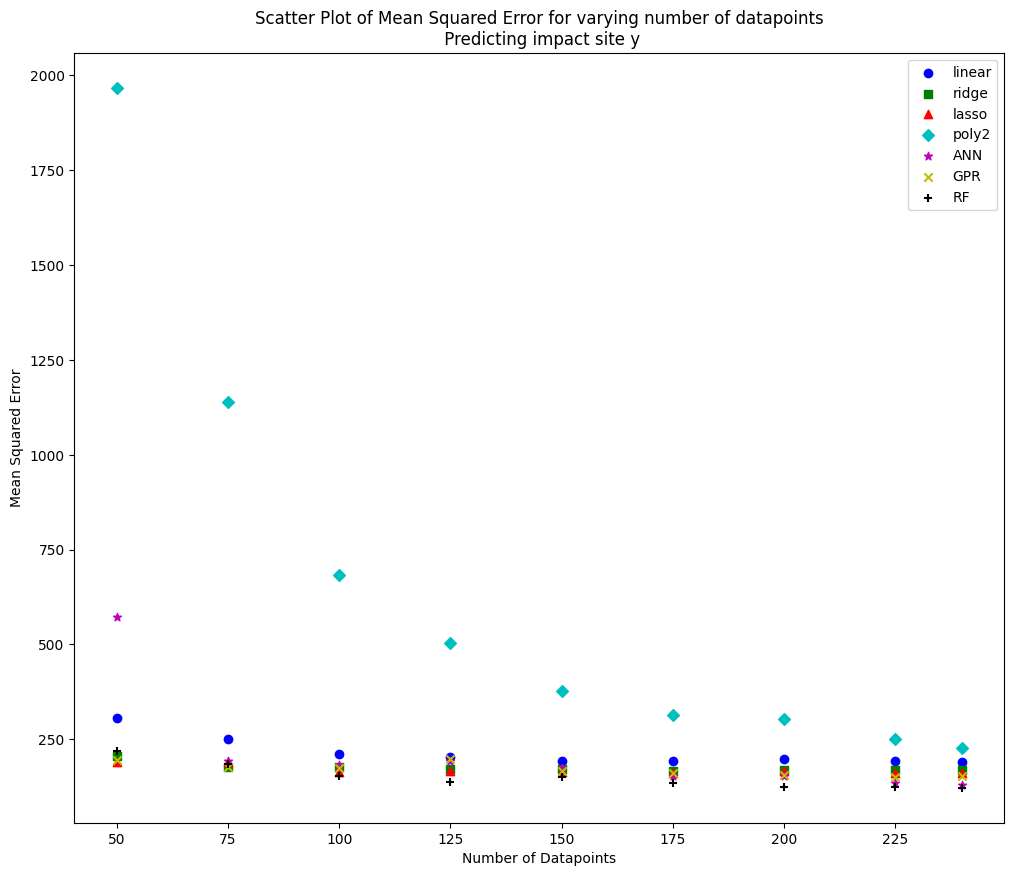

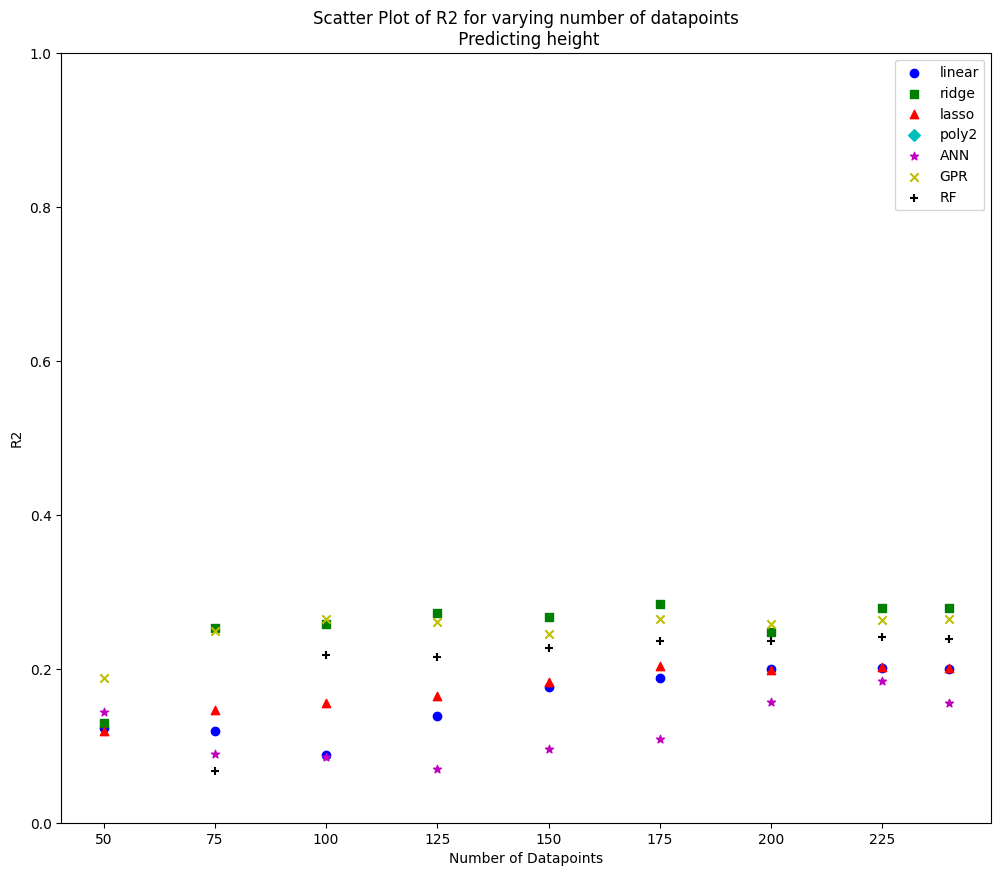

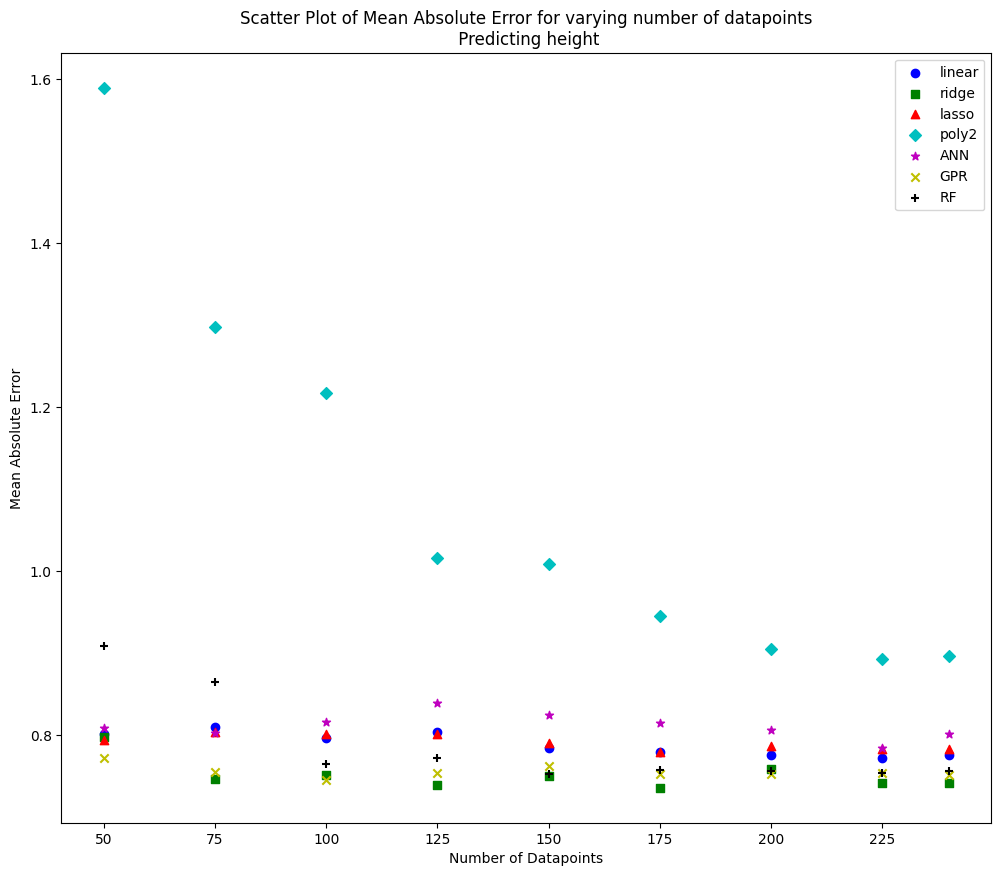

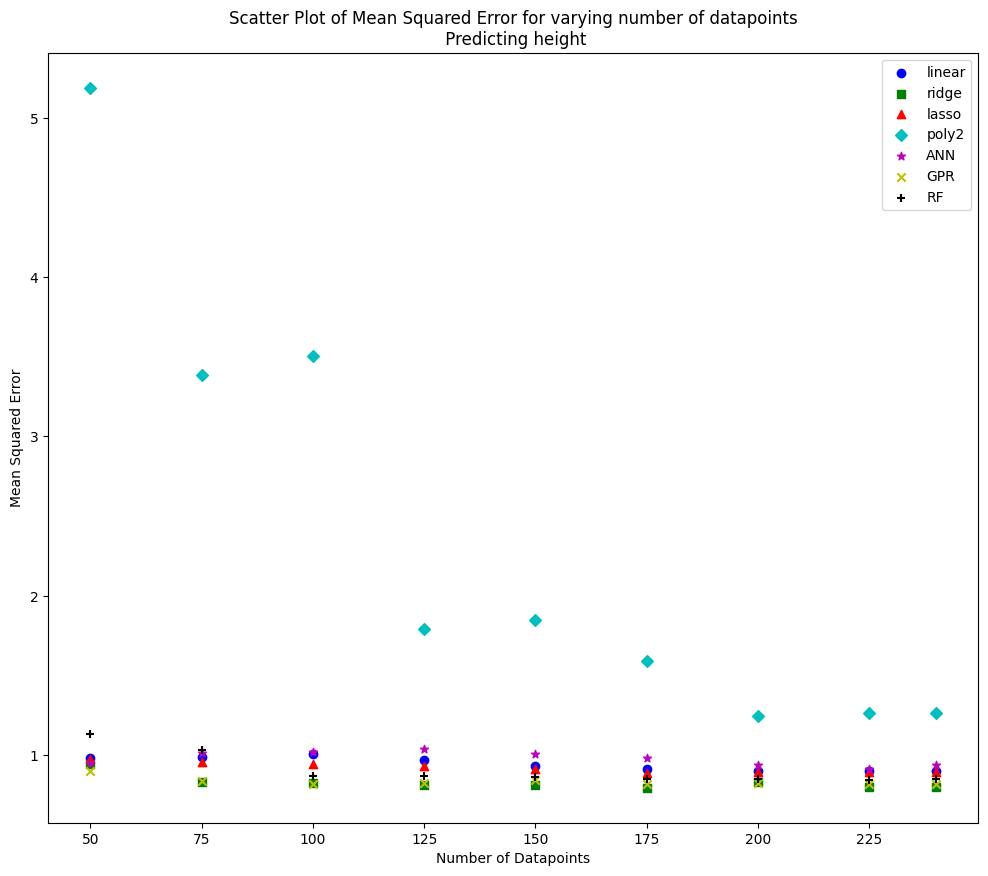

In [8]:
all_metrics = ['R2', 'Mean Absolute Error', 'Mean Squared Error']
for label in labels_to_predict:
        for metric in all_metrics:
            plot_varying_number_of_datapoints(performances_dictionary, label, model_types, metric)
